# Практическая работа №6

### __1.__К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

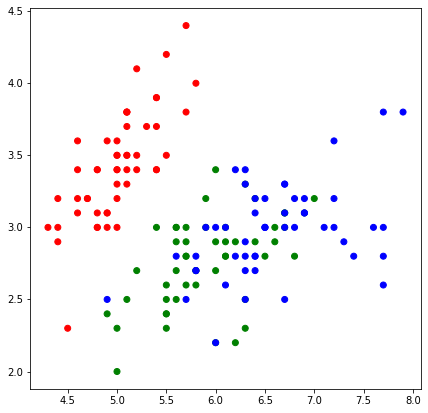

In [ ]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [8]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

def weight_one(d, k, i):
    return 1.0

In [ ]:
def knn(x_train, y_train, x_test, k, metrics_call=e_metrics, weight_call=weight_one):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = metrics_call(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0.0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            classes[d[1]] += weight_call(d[0], k, i)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [ ]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
def get_graph(X_train, y_train, k, metrics_call=e_metrics, weight_call=weight_one):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, metrics_call=metrics_call, weight_call=weight_call)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [ ]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


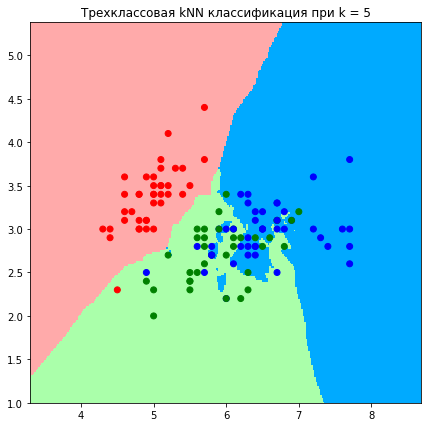

In [ ]:
get_graph(X_train, y_train, k)

In [ ]:
def weight_number(d, k, i):
    return (k + 1 - i)/k

In [ ]:
k = 15

y_pred = knn(X_train, y_train, X_test, k, weight_call=weight_number)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 15: 0.867


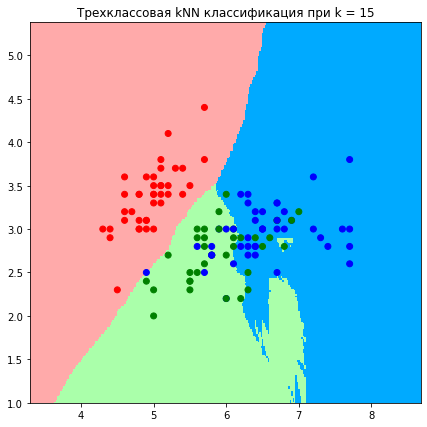

In [ ]:
get_graph(X_train, y_train, k, weight_call=weight_number)

### __2.__ К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [ ]:
def weight_distance(q):
    def weight_distance_(d, k, i):
        return q**d
    return weight_distance_

In [ ]:
 for k in range(5, 12):
    for q in np.linspace(0.4, 1.0, 6):
        y_pred = knn(X_train, y_train, X_test, k, weight_call=weight_distance(q))
        print(f'Точность алгоритма при k = {k} q = {q:4.2f}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5 q = 0.40: 0.867
Точность алгоритма при k = 5 q = 0.52: 0.867
Точность алгоритма при k = 5 q = 0.64: 0.867
Точность алгоритма при k = 5 q = 0.76: 0.867
Точность алгоритма при k = 5 q = 0.88: 0.867
Точность алгоритма при k = 5 q = 1.00: 0.867
Точность алгоритма при k = 6 q = 0.40: 0.867
Точность алгоритма при k = 6 q = 0.52: 0.867
Точность алгоритма при k = 6 q = 0.64: 0.867
Точность алгоритма при k = 6 q = 0.76: 0.867
Точность алгоритма при k = 6 q = 0.88: 0.867
Точность алгоритма при k = 6 q = 1.00: 0.833
Точность алгоритма при k = 7 q = 0.40: 0.800
Точность алгоритма при k = 7 q = 0.52: 0.800
Точность алгоритма при k = 7 q = 0.64: 0.800
Точность алгоритма при k = 7 q = 0.76: 0.800
Точность алгоритма при k = 7 q = 0.88: 0.800
Точность алгоритма при k = 7 q = 1.00: 0.800
Точность алгоритма при k = 8 q = 0.40: 0.833
Точность алгоритма при k = 8 q = 0.52: 0.833
Точность алгоритма при k = 8 q = 0.64: 0.833
Точность алгоритма при k = 8 q = 0.76: 0.833
Точность а

Повысить качество не получилось, но алгоритм стал более устойчив на большем кол-ве соседей.

### __3.__ Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

Получить значение качества больше чем 0.867 не получилось, а данное значение достигается на различных количествах соседей.

### __4 (опция).__ Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [38]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

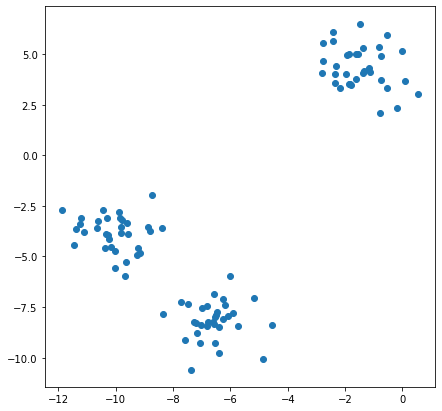

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [40]:
def kmeans(data, k, max_iterations=1000, min_distance=1e-4):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [41]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [42]:
def mean_distanse_in_clusters(centroids, clusters):
    dinc = []
    number = 0
    for key, values in clusters.items():
        dinc.append(sum(sum((values-centroids[key])**2)))
        number += len(values)
    return sum(dinc)/number

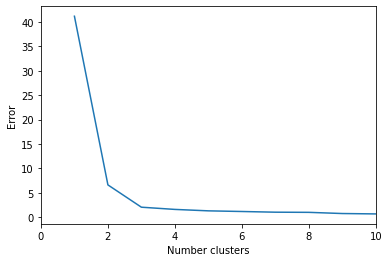

In [43]:
max_clusters = 10
err = []
for k in range(1, max_clusters+1):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    err.append(mean_distanse_in_clusters(centroids, clusters))

plt.xlabel('Number clusters')
plt.ylabel('Error')
plt.xlim(0, 10)
plt.plot(list(range(1, max_clusters+1)), err)
plt.show()